In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
from io import StringIO
#https://www.kaggle.com/competitions/playground-series-s4e2/data?select=train.csv

In [197]:
s3 = boto3.client('s3')

bucket_name = 'obesity-risk-data'
file_key = 'train.csv'#name in the bucket

response = s3.get_object(Bucket=bucket_name, Key=file_key)
content = response['Body'].read().decode('utf-8')
#get the data from aws just to practice using it
df = pd.read_csv(StringIO(content))
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [198]:
#check for any nulls in my dataset
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [199]:
y = df['NObeyesdad']
X = df.drop(columns = ['NObeyesdad'])

In [200]:
string_col = X.select_dtypes(include=['object']).columns
print(string_col)
#there are many columns we need to make into numerics. 
#It seems that Gender, family_history_with_overweight, family_history_with_overweight, SMOKE, SCC, and MTRANS are the ones that are nominal where it not going to be in order
#while CAEC and CALC are ordinal
print(X['CAEC'].unique())
print(X['CALC'].unique())
print(X['MTRANS'].unique())

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')
['Sometimes' 'Frequently' 'no' 'Always']
['Sometimes' 'no' 'Frequently']
['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']


In [201]:
#first start with the no/yes columns
nominal_column = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
X[nominal_column] = X[nominal_column].map({'no': 0, 'yes': 1}.get)
#then the Gender Column
X['Gender'] = X['Gender'].map({'Female': 0, 'Male': 1})
#now the ordinal
ordinal_column = ['CAEC', 'CALC']
X[ordinal_column] = X[ordinal_column].map({'no': 0, 'Sometimes' :1,'Frequently':2, 'Always':3}.get)
#then the transportation
X = pd.get_dummies(X, columns=['MTRANS'])
X

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,...,2.763573,0,0.000000,0.976473,1,False,False,False,True,False
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,...,2.000000,0,1.000000,1.000000,0,True,False,False,False,False
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,...,1.910378,0,0.866045,1.673584,0,False,False,False,True,False
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,...,1.674061,0,1.467863,0.780199,1,False,False,False,True,False
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,...,1.979848,0,1.967973,0.931721,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,1,...,2.151809,0,1.330519,0.196680,1,False,False,False,True,False
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,2,...,1.000000,0,2.000000,1.000000,1,False,False,False,True,False
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,1,...,2.000000,0,1.158040,1.198439,0,False,False,False,True,False
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,1,...,2.144838,0,0.000000,0.973834,0,True,False,False,False,False


In [202]:
print(y.unique())
y = y.map({'Insufficient_Weight': 0, 'Normal_Weight' :1,'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I': 4, 'Obesity_Type_II' :5,'Obesity_Type_III':6}.get)
y

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


0        3
1        1
2        0
3        6
4        3
        ..
20753    5
20754    0
20755    5
20756    3
20757    5
Name: NObeyesdad, Length: 20758, dtype: int64

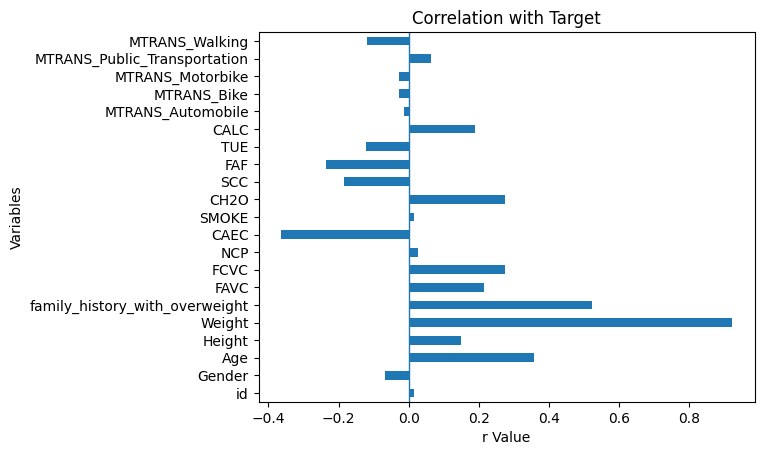

In [ ]:
correlations = X.corrwith(y)
correlations.plot(kind='barh')

plt.title('Correlation with Target')
plt.axvline(0, linewidth=1)
plt.xlabel("r Value")
plt.ylabel("Variables")
plt.show()
#it's pretty obvious to see Weight has the highest correlation with Obesity which is expected

## Creating My Own Linear Regression

In [ ]:
class LinearRegression:

    def __init__(self, learning_rate=0.07, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.coefficients = None
        self.intercept = None
        self.length = 0
    
    def fit(self, X_train, y_train):
        X_train = X_train.to_numpy(dtype=np.float64)
        y_train = y_train.to_numpy(dtype=np.float64)#convert the x and y into numpy matrix
        n, n_features = X_train.shape
        self.features_count = n_features

        beta_0 = 0#yint
        beta_i = np.zeros(n_features, dtype=np.float64)#slope

        
        count =0
        y = np.zeros(n, dtype=np.float64)
        for i in range(self.n_iterations):
            y_diff_beta_0 = 0
            y_diff_beta_i =0
            total_squared_error = 0
            for j in range(n):
                y_pred = beta_0 + np.dot(X_train[j], beta_i)#get the y prediction
                error = y_pred - y_train[j]#calculate the error

                y_diff_beta_0 += error#sum for the derivative of mse with respect to beta0
                y_diff_beta_i += error * X_train[j]#sum for the derivative of mse with respect to betai
                total_squared_error += error ** 2#get total 

            gradient_beta_0 = (2 / n) * y_diff_beta_0#the gradient with respect to beta0
            gradient_beta_i = (2 / n) * y_diff_beta_i#the gradient with respect to beta1


            if count%100==0:
                print((1/n)*total_squared_error)#print mse so we can track whther its getting better
            beta_0 -= self.learning_rate*gradient_beta_0#new beta0
            beta_i -= self.learning_rate*gradient_beta_i#new beta1
            count+=1

        self.coefficients = beta_i
        self.intercept = beta_0
        self.length = n

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        if X.ndim == 1:#case its just 1point
            X = X.reshape(1, -1)
        return self.intercept + np.dot(X, self.coefficients)

    def accuracy(self, y_true, y_pred):#R^2 accuracy
        y_true = np.array(y_true, dtype=np.float64).flatten()
        y_pred = np.array(y_pred, dtype=np.float64).flatten()
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        
        if ss_tot == 0:
            return 100.0 if np.all(y_true == y_pred) else 0.0
        
        r_squared = 1-(ss_res / ss_tot)
        return max(0.0, min(100.0, r_squared * 100))

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)  


X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X), pd.Series(y), test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


14.88919578622816
0.30215182781154426
0.3016439189872677
0.30164313448818336
0.30164313325493525
0.30164313325299486
0.3016431332529921
0.30164313325299236
0.3016431332529914
0.3016431332529913


In [184]:
pred = model.predict(X_test)
accuracy = model.accuracy(y_test, pred)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 92.83%
